In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers, regularizers, models, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle, randint
import numpy as np
import future
from keras.applications import VGG16
from PIL import Image

import matplotlib.pyplot as plt
import os, shutil
from os import listdir, mkdir
from os.path import join, isfile, isdir, exists
from keras.models import load_model, model_from_json

In [28]:
def make_dir_helper(dir_path):
    if not os.path.exists(dir_path):
        mkdir(dir_path)
        return True
    return False

In [29]:
def delete_dir_helper(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
        return True
    return False

In [30]:
def compile_model(model):
    model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])
    model.summary()

In [41]:
def get_class_names(base_dir):
    return [dname for dname in listdir(base_dir) if isdir(join(base_dir, dname))]

In [40]:
original_dataset_dir = join(os.path.expanduser('~'), project_dir_name, 'original data 2');
get_dataset(original_dataset_dir)

['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


In [18]:
#project_dir_name = join('Esri Project')
project_dir_name = join('desktop','Esri Project')
original_dataset_dir = join(os.path.expanduser('~'), project_dir_name, 'original data');
base_dir =  join(os.path.expanduser('~'), project_dir_name, 'data');
base_scripts_dir =  join(os.path.expanduser('~'), project_dir_name, 'scripts');
model_dir =  join(os.path.expanduser('~'),  project_dir_name, 'models');

MODEL_FILE_NAME = 'map_multi_model_4.h5'
dnames = [os.path.join(target_dir, dname) for dname in os.listdir(target_dir)]

CLASSES_TO_CLASSIFY = ['Airplane', 'Beach', 'Buildings', 'Forest', 'Freeway', 'Parkinglot']
ext = '.jpg'
IMAGE_SIZE = 150
EPOCHS = 17
NO_TRAINING_SAMPLES = 70
BATCH_SIZE = 15
STEPS_PER_EPOCH = 5

train_dir = join(base_dir, 'train')
validation_dir = join(base_dir, 'validation')
test_dir = join(base_dir, 'test')
model_file_path = join(model_dir, MODEL_FILE_NAME)

# Delete the previous data folder and all its contents
delete_dir_helper(base_dir)

make_dir_helper(base_dir)
make_dir_helper(model_dir)

# Make base directories
make_dir_helper(train_dir)
make_dir_helper(validation_dir)
make_dir_helper(test_dir)

for classes in CLASSES_TO_CLASSIFY:
    
    train_class_dir = join(train_dir, classes)
    validation_class_dir = join(validation_dir, classes)
    test_class_dir = join(test_dir, classes)
    
    # Make train sub directories
    make_dir_helper(train_class_dir)
    make_dir_helper(validation_class_dir)
    make_dir_helper(test_class_dir)
    
    indexes = [i for i in range(100)]
    shuffle(indexes)
    train_indexes = indexes[:70]
    test_indexes = indexes[70:100]
    
    fnames = [(classes + '{}' + ext).format(i) for i in train_indexes]
    for fname in fnames:
        src_dir = join(original_dataset_dir, fname)
        dst_dir = join(train_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

    # Copy classes into the validation dataset
    fnames = [(classes + '{}' + ext).format(i) for i in test_indexes]
    for fname in fnames:
        src_dir = join(original_dataset_dir, fname)
        dst_dir = join(validation_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

    # Copy classes into the test dataset
    fnames = [(classes + '{}' + ext).format(i) for i in test_indexes]
    for fname in fnames:
        src_dir = join(original_dataset_dir, fname)
        dst_dir = join(test_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

NameError: name 'target_dir' is not defined

In [32]:
is_model_from_file = False
model = None
if exists(model_file_path):
    print('Found saved model with name ' + MODEL_FILE_NAME)
    model = load_model(model_file_path)
    compile_model(model)
else:
    print('NO saved model with name ' + MODEL_FILE_NAME)

Found saved model with name map_multi_model_3.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 15,764,166
Trainable params: 15,764,166
Non-trainable params: 0
_________________________________________________________________


In [33]:
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       vertical_flip=True,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)  
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir,  
            target_size=(IMAGE_SIZE, IMAGE_SIZE),  
            batch_size=BATCH_SIZE,
            class_mode='categorical')  

    validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(IMAGE_SIZE, IMAGE_SIZE),
            batch_size=BATCH_SIZE,
            class_mode='categorical')

Found 420 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [34]:
    for idx, (data_batch, labels_batch) in enumerate(train_generator):
        print('data batch:', data_batch.shape)
        print('labels batch:', labels_batch.shape)
        break

data batch: (15, 150, 150, 3)
labels batch: (15, 6)


In [35]:
#     model = models.Sequential()
#     model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(conv_base)
#     model.add(layers.Flatten())
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(6, activation='softmax'))

In [36]:
    model = models.Sequential()
    conv_base = VGG16(weights='imagenet' ,include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    conv_base.trainable = False
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))

In [37]:
    compile_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 15,764,166
Trainable params: 1,049,478
Non-trainable params: 14,714,688
_________________________________________________________________


Epoch 1/17
10/10 [==============================] - 55s - loss: 2.2412 - acc: 0.2000 - val_loss: 1.8821 - val_acc: 0.3267
Epoch 2/17
10/10 [==============================] - 54s - loss: 2.0661 - acc: 0.2400 - val_loss: 1.7457 - val_acc: 0.4267
Epoch 3/17
10/10 [==============================] - 54s - loss: 1.9164 - acc: 0.3133 - val_loss: 1.2448 - val_acc: 0.6467
Epoch 4/17
10/10 [==============================] - 55s - loss: 1.4286 - acc: 0.5467 - val_loss: 1.0977 - val_acc: 0.8133
Epoch 5/17
10/10 [==============================] - 55s - loss: 0.8479 - acc: 0.7933 - val_loss: 2.0166 - val_acc: 0.5467
Epoch 6/17
10/10 [==============================] - 55s - loss: 1.4787 - acc: 0.7267 - val_loss: 0.4012 - val_acc: 0.9467
Epoch 7/17
10/10 [==============================] - 54s - loss: 0.6123 - acc: 0.8667 - val_loss: 0.3610 - val_acc: 0.9467
Epoch 8/17
10/10 [==============================] - 54s - loss: 0.8524 - acc: 0.8067 - val_loss: 0.3476 - val_acc: 0.9533
Epoch 9/17
10/10 [======

C:\Users\thom8982\AppData\Local\Programs\Python\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


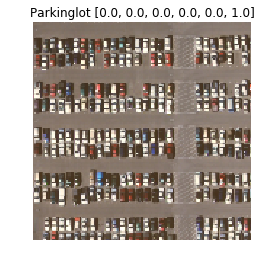

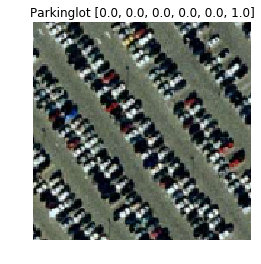

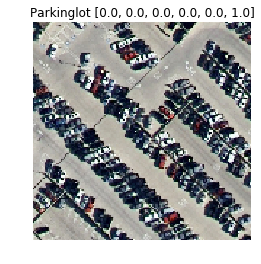

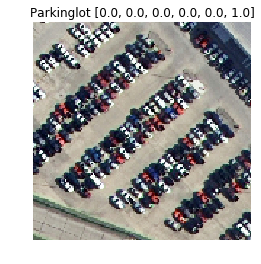

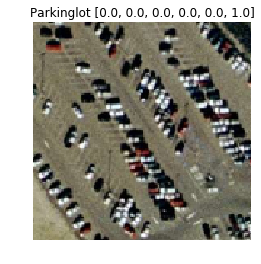

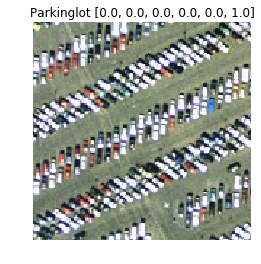

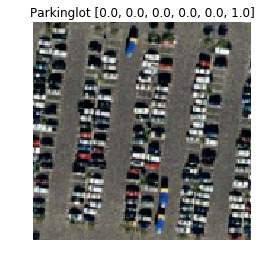

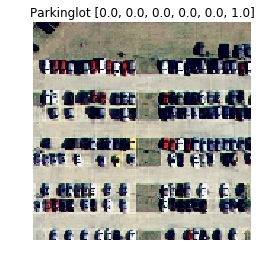

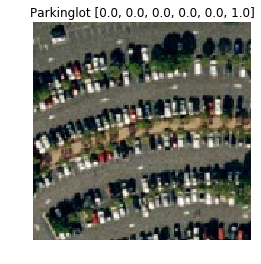

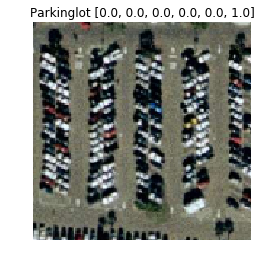

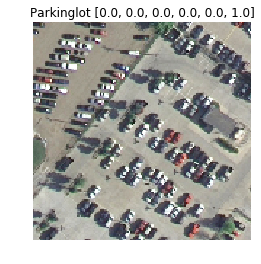

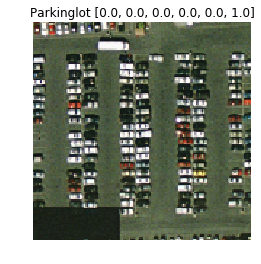

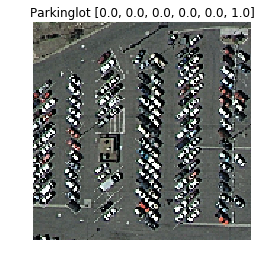

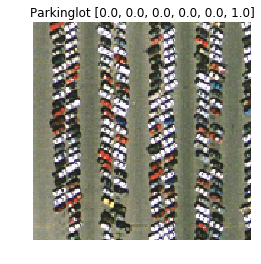

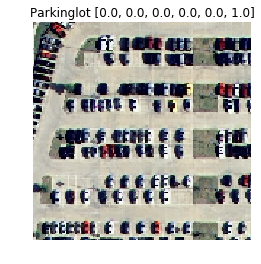

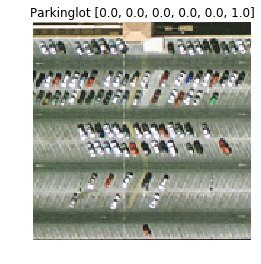

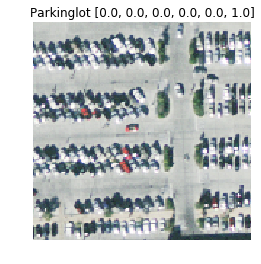

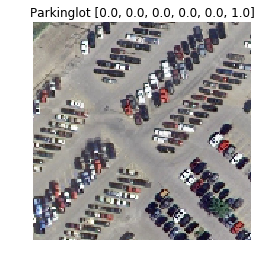

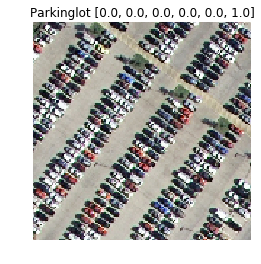

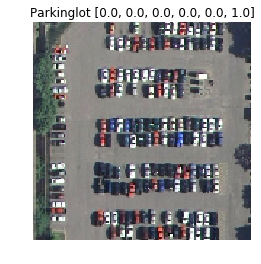

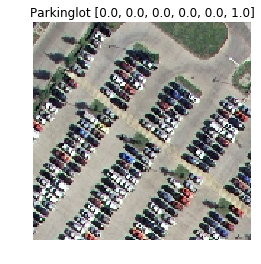

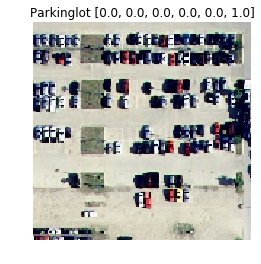

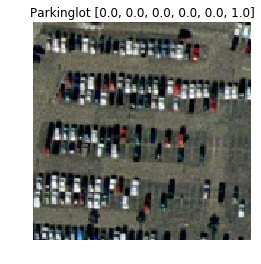

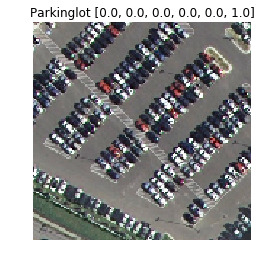

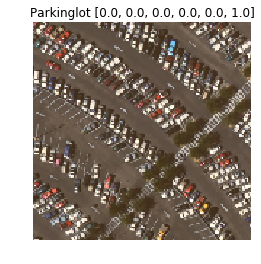

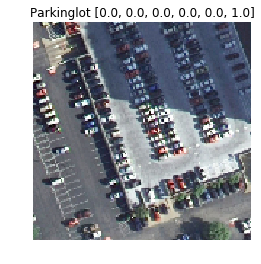

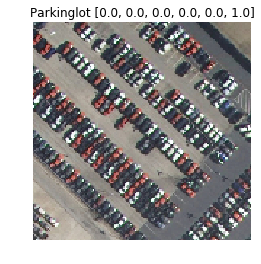

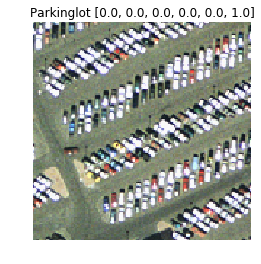

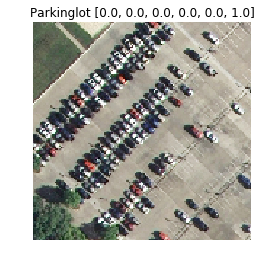

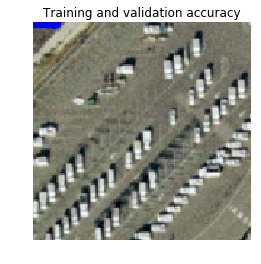

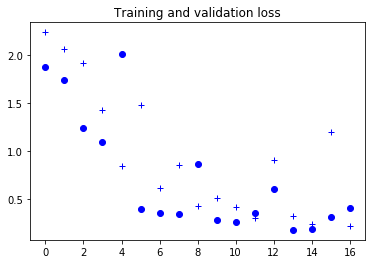

In [38]:
    callbacks = [
        EarlyStopping(monitor='acc', patience=1, mode='auto'),
        ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath=model_file_path)
    ]
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks = callbacks,
        validation_steps=10)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b+')
    plt.plot(epochs, val_acc, 'bo')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'b+')
    plt.plot(epochs, val_loss, 'bo')
    plt.title('Training and validation loss')

    plt.show()

In [ ]:
fnames = []
target_dir = test_dir
# dnames = [os.path.join(target_dir, dname) for dname in os.listdir(target_dir)]
dnames = [os.path.join(target_dir, dname) for dname in os.listdir(target_dir)]

for dname in dnames:
    
    fnames =([os.path.join(dname, fname) for fname in os.listdir(dname)])
    
    cur_class = dname.split('\\')[-1]
    print(cur_class)

    shuffle(fnames)

    NO_OF_FIG = 15
    correct_predict = 0

    for index, img_path in enumerate(fnames):
          
        img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) 
        
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        prediction = model.predict(x)[0]
        # print(prediction)
        # prediction = [round(x, 2) for x in prediction]
        
        img.thumbnail((50,50), Image.ANTIALIAS)
        imgplot = plt.imshow(img)

        max_indexes = (np.argwhere(prediction == np.amax(prediction))).flatten()
        print(max_indexes)

        title = ''

        for idx in max_indexes:

            if prediction[idx] > 0.8:
                pred_class = CLASSES_TO_CLASSIFY[idx]
                title += pred_class + ' '
                # print(pred_class, cur_class)
                if pred_class == cur_class:         
                    correct_predict +=1
          

        title += str(prediction)
        plt.axis('off')
        plt.title(title)

    print('Accuracy of class:' + str(correct_predict / len(fnames) * 100))
    plt.show()